In [1]:
import numpy as np
import pandas as pd

In [8]:
cctv_seoul = pd.read_csv('data/서울시 CCTV 설치운영 현황(자치구)-연도별.csv', header = 1, thousands = ',', encoding = 'cp949')
cctv_seoul.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [10]:
cctv_seoul.drop([0], inplace = True)
cctv_seoul.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [11]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        25 non-null     object
 1   총계        25 non-null     int64 
 2   2011년 이전  25 non-null     int64 
 3   2011년     25 non-null     int64 
 4   2012년     25 non-null     int64 
 5   2013년     25 non-null     int64 
 6   2014년     25 non-null     int64 
 7   2015년     25 non-null     int64 
 8   2016년     25 non-null     int64 
 9   2017년     25 non-null     int64 
 10  2018년     25 non-null     int64 
 11  2019년     25 non-null     int64 
 12  2020년     25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


In [14]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace = True)

In [15]:
cctv_seoul.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175


In [19]:
pop_seoul = pd.read_csv('data/population.txt', header = 2, delim_whitespace = True, thousands = ',')
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.1/4,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
1,2021.1/4,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
2,2021.1/4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767
3,2021.1/4,용산구,112881,243336,118120,125216,229013,110181,118832,14323,7939,6384,2.03,39575
4,2021.1/4,성동구,135883,298421,145358,153063,291906,142506,149400,6515,2852,3663,2.15,45968


In [20]:
pop_seoul.drop(['기간', '세대', '남자', '여자', '남자.1', '여자.1', 
               '남자.2', '여자.2', '세대당인구'], axis = 1, inplace = True)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [21]:
pop_seoul.rename(columns = {pop_seoul.columns[0]: '구별', pop_seoul.columns[1]: '인구수',
                            pop_seoul.columns[2]: '한국인',
                            pop_seoul.columns[3]: '외국인',
                            pop_seoul.columns[4]: '고령자'}, inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [22]:
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


In [23]:
cctv_seoul['구별'].unique() #중복 제거 후 종류 보여줌

array(['종로구', '중 구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [24]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [26]:
cctv_seoul.loc[cctv_seoul['구별'] == '중 구', '구별'] = '중구'
cctv_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [28]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int64 
 2   한국인     25 non-null     int64 
 3   외국인     25 non-null     int64 
 4   고령자     25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [29]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   총계        25 non-null     int64 
 2   2011년 이전  25 non-null     int64 
 3   2011년     25 non-null     int64 
 4   2012년     25 non-null     int64 
 5   2013년     25 non-null     int64 
 6   2014년     25 non-null     int64 
 7   2015년     25 non-null     int64 
 8   2016년     25 non-null     int64 
 9   2017년     25 non-null     int64 
 10  2018년     25 non-null     int64 
 11  2019년     25 non-null     int64 
 12  2020년     25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


In [30]:
cctv_seoul.sort_values(by='총계', ascending = True)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
10,도봉구,1356,0,49,29,96,181,79,159,134,223,214,192
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중구,2001,16,6,199,90,125,218,333,462,228,194,130
20,동작구,2262,165,73,93,29,503,130,254,278,255,242,240
11,노원구,2282,0,0,90,105,109,605,405,256,201,240,271
6,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104
18,금천구,2365,0,0,0,178,80,361,133,196,540,369,508
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
14,마포구,2401,270,66,93,77,61,162,350,358,340,384,240
16,강서구,2437,26,29,129,106,213,188,168,506,259,457,356


In [31]:
cctv_seoul.sort_values(by='총계', ascending = False)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456
15,양천구,3307,1217,282,175,201,173,193,351,120,142,255,198
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930


In [33]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2017년']
                      + cctv_seoul['2018년'] + cctv_seoul['2019년'] + cctv_seoul['2020년']) / (cctv_seoul['2011년 이전']
                                                                                           + cctv_seoul['2011년']
                                                                                           + cctv_seoul['2012년']
                                                                                           + cctv_seoul['2013년']
                                                                                           + cctv_seoul['2014년']
                                                                                           + cctv_seoul['2015년']) * 100
cctv_seoul.sort_values(by = '최근증가율', ascending = False)

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486,811.851852
5,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,435.849057
24,송파구,2743,64,9,61,86,85,215,146,241,542,1068,226,427.500000
12,은평구,3660,14,0,3,44,332,329,555,403,635,1057,288,406.925208
8,성북구,3754,42,41,87,174,230,323,587,461,860,716,233,318.506132
22,서초구,3730,0,117,72,93,71,563,516,1061,436,361,440,307.205240
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,300.121803
18,금천구,2365,0,0,0,178,80,361,133,196,540,369,508,282.067851
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931,256.682770
16,강서구,2437,26,29,129,106,213,188,168,506,259,457,356,252.677279


In [34]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


In [42]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수']  * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수']  * 100

In [43]:
pop_seoul.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133708,124552,9156,24767,6.847758,18.523200
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
17,구로구,426675,401074,25601,70717,6.000117,16.573973
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [44]:
pop_seoul.sort_values(by = '고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,307537,304078,3459,62893,1.124743,20.450547
10,도봉구,323752,321717,2035,62360,0.628568,19.261657
2,중구,133708,124552,9156,24767,6.847758,18.523200
12,은평구,479607,475501,4106,85140,0.856118,17.752034
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [46]:
pop_seoul.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
23,강남구,539538,534796,4742,75602,0.878900,14.012359
11,노원구,522225,518278,3947,85906,0.755804,16.449998
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [47]:
pop_seoul.sort_values(by = '외국인', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,426675,401074,25601,70717,6.000117,16.573973
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
3,용산구,243336,229013,14323,39575,5.886100,16.263520
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [48]:
pop_seoul.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133708,124552,9156,24767,6.847758,18.523200
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
17,구로구,426675,401074,25601,70717,6.000117,16.573973
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [49]:
pop_seoul.sort_values(by = '고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
11,노원구,522225,518278,3947,85906,0.755804,16.449998
12,은평구,479607,475501,4106,85140,0.856118,17.752034
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [50]:
pop_seoul.sort_values(by = '고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,307537,304078,3459,62893,1.124743,20.450547
10,도봉구,323752,321717,2035,62360,0.628568,19.261657
2,중구,133708,124552,9156,24767,6.847758,18.523200
12,은평구,479607,475501,4106,85140,0.856118,17.752034
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [52]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,216,7,10,582,210,150,1,259,85,9,200,47.148936,156567,147296,9271,27781,5.921427,17.743841
1,중구,2001,16,6,199,90,125,218,333,462,228,194,130,205.963303,133708,124552,9156,24767,6.847758,18.523200
2,용산구,2383,31,3,71,234,125,221,298,351,125,307,617,247.883212,243336,229013,14323,39575,5.886100,16.263520
3,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,172.692009,298421,291906,6515,45968,2.183157,15.403742
4,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [53]:
data_result.drop(['2011년 이전', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', \
                  '2017년', '2018년', '2019년', '2020년'], axis=1, inplace=True)
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
1,중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
2,용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
3,성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
4,광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [54]:
data_result.set_index('구별', inplace = True)
data_result.head()
#0.3 어느정도 상관관계
#0.7 강한 상관관계

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289


In [55]:
data_result.to_csv('data/cctv_pop_seoul.csv', sep = ',', encoding = 'utf-8')

In [56]:
np.corrcoef(data_result['고령자비율'], data_result['총계'])

array([[ 1.        , -0.42943277],
       [-0.42943277,  1.        ]])

In [57]:
np.corrcoef(data_result['외국인비율'], data_result['총계'])

array([[ 1.       , -0.1694645],
       [-0.1694645,  1.       ]])

In [58]:
np.corrcoef(data_result['인구수'], data_result['총계'])

array([[1.        , 0.45645369],
       [0.45645369, 1.        ]])

In [59]:
#conda activate p39-env
#conda install seaborn

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#한글 처리 코드
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': #macos
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #windows os
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

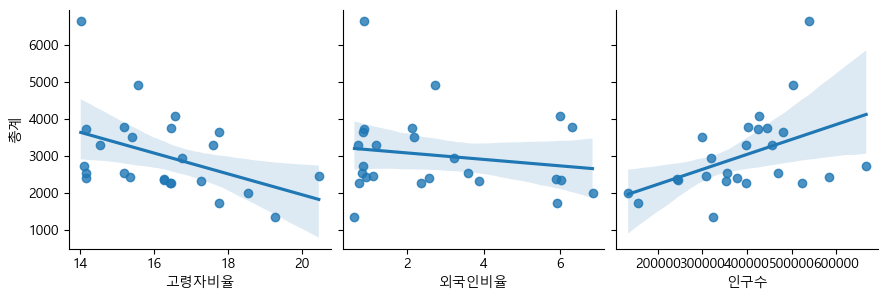

In [63]:
sns.pairplot(data_result, x_vars = ['고령자비율', '외국인비율', '인구수'],
            y_vars = ['총계'], kind = 'reg', height=3)
plt.show()

In [64]:
data_result.sort_values(by = '총계', ascending = False)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,6645,256.682770,539538,534796,4742,75602,0.878900,14.012359
관악구,4909,144.960080,504140,490352,13788,78400,2.734955,15.551236
구로구,4075,117.681624,426675,401074,25601,70717,6.000117,16.573973
영등포구,3773,195.226917,403070,377590,25480,61197,6.321483,15.182723
성북구,3754,318.506132,444295,434826,9469,73158,2.131242,16.466087
서초구,3730,307.205240,425103,421315,3788,60209,0.891078,14.163391
은평구,3660,406.925208,479607,475501,4106,85140,0.856118,17.752034
성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
양천구,3307,47.568050,456019,452677,3342,66231,0.732864,14.523737


In [65]:
data_result.sort_values(by = '인구수', ascending = False)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,2743,427.500000,667115,661411,5704,94145,0.855025,14.112260
강서구,2437,252.677279,582804,577320,5484,89377,0.940968,15.335687
강남구,6645,256.682770,539538,534796,4742,75602,0.878900,14.012359
노원구,2282,151.045105,522225,518278,3947,85906,0.755804,16.449998
관악구,4909,144.960080,504140,490352,13788,78400,2.734955,15.551236
은평구,3660,406.925208,479607,475501,4106,85140,0.856118,17.752034
강동구,2547,251.310345,468815,464900,3915,71203,0.835084,15.187867
양천구,3307,47.568050,456019,452677,3342,66231,0.732864,14.523737
성북구,3754,318.506132,444295,434826,9469,73158,2.131242,16.466087


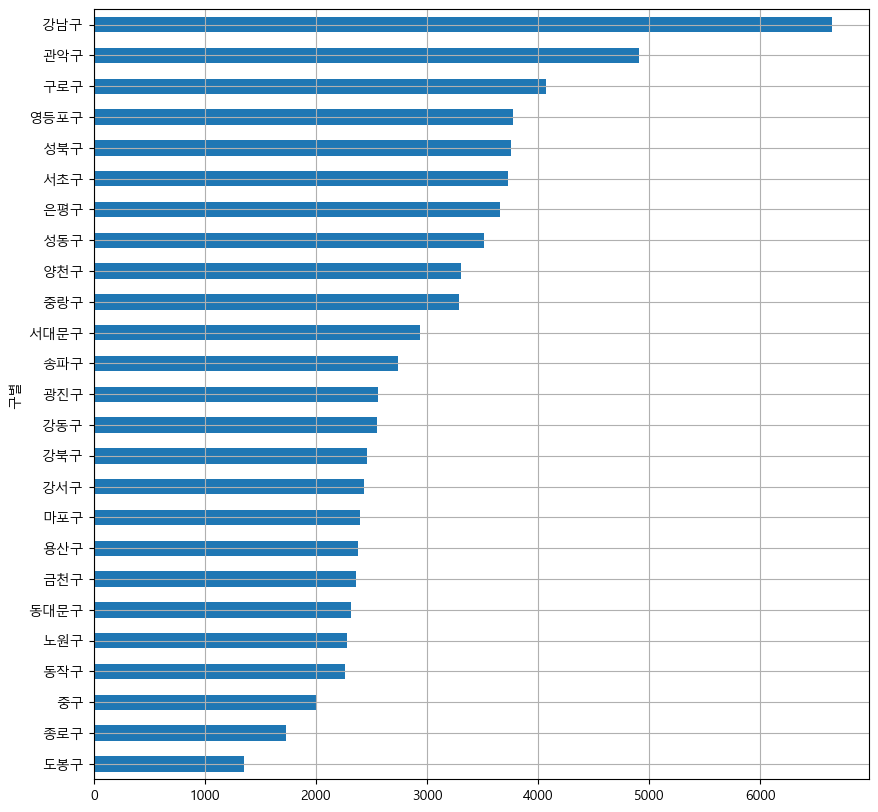

In [78]:
data_result['총계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

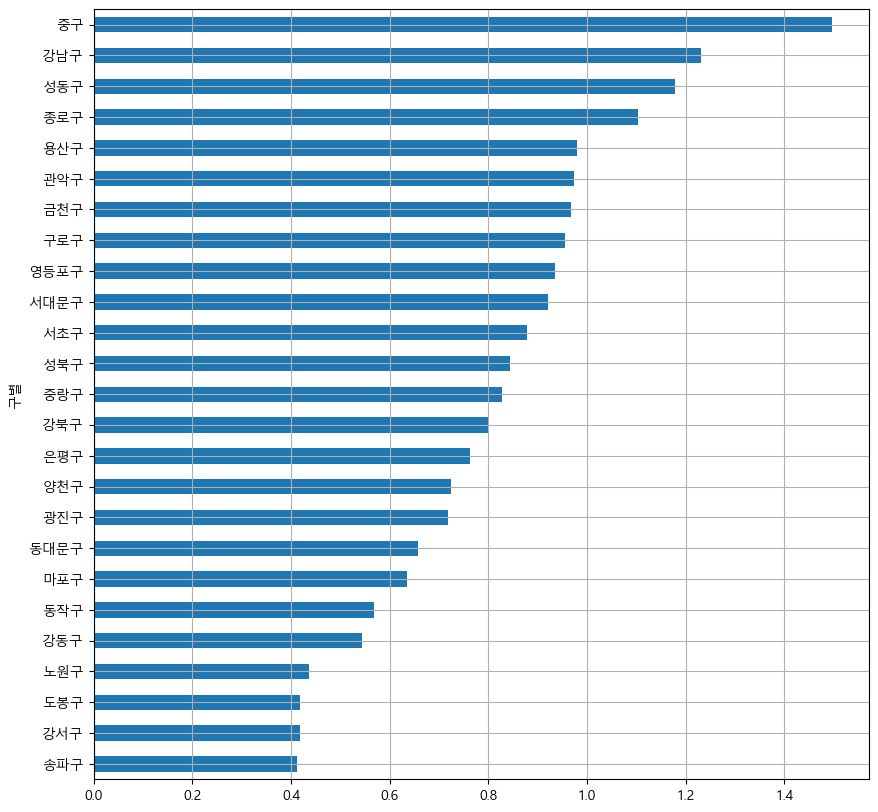

In [80]:
data_result['cctv비율'] = data_result['총계'] / data_result['인구수'] * 100
data_result['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

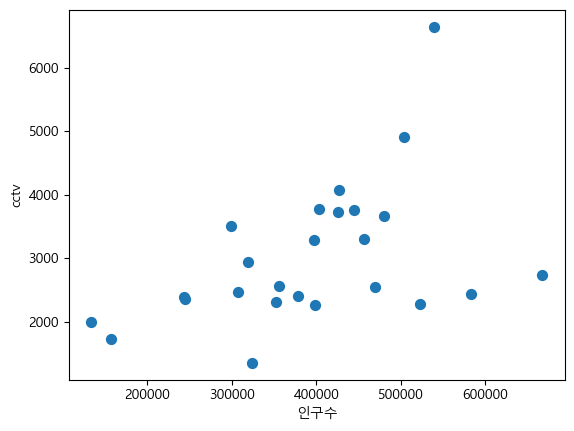

In [81]:
plt.scatter(data_result['인구수'], data_result['총계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.show()

In [82]:
fp = np.polyfit(data_result['인구수'], data_result['총계'], 1)

In [83]:
fp #y = ax + b --> output (a, b)

array([4.03056886e-03, 1.43272762e+03])

In [84]:
f1 = np.poly1d(fp)
fx = np.linspace(100000, 700000, 100)

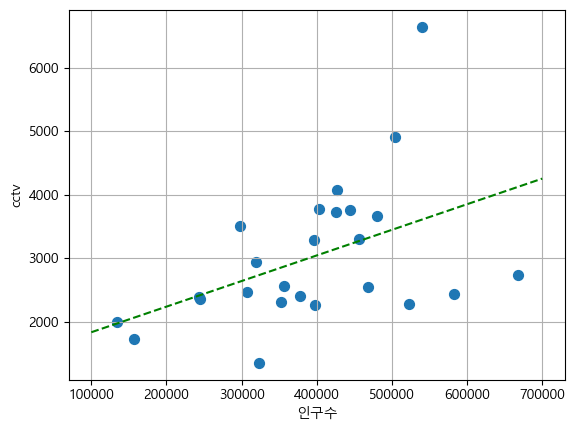

In [94]:
plt.scatter(data_result['인구수'], data_result['총계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [97]:
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending = False)
df_sort.head()                   

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,6645,256.682770,539538,534796,4742,75602,0.878900,14.012359,1.231609,3037.627324
관악구,4909,144.960080,504140,490352,13788,78400,2.734955,15.551236,0.973737,1444.301400
도봉구,1356,212.442396,323752,321717,2035,62360,0.628568,19.261657,0.418839,1381.632345
송파구,2743,427.500000,667115,661411,5704,94145,0.855025,14.112260,0.411173,1378.580559
강서구,2437,252.677279,582804,577320,5484,89377,0.940968,15.335687,0.418151,1344.759268


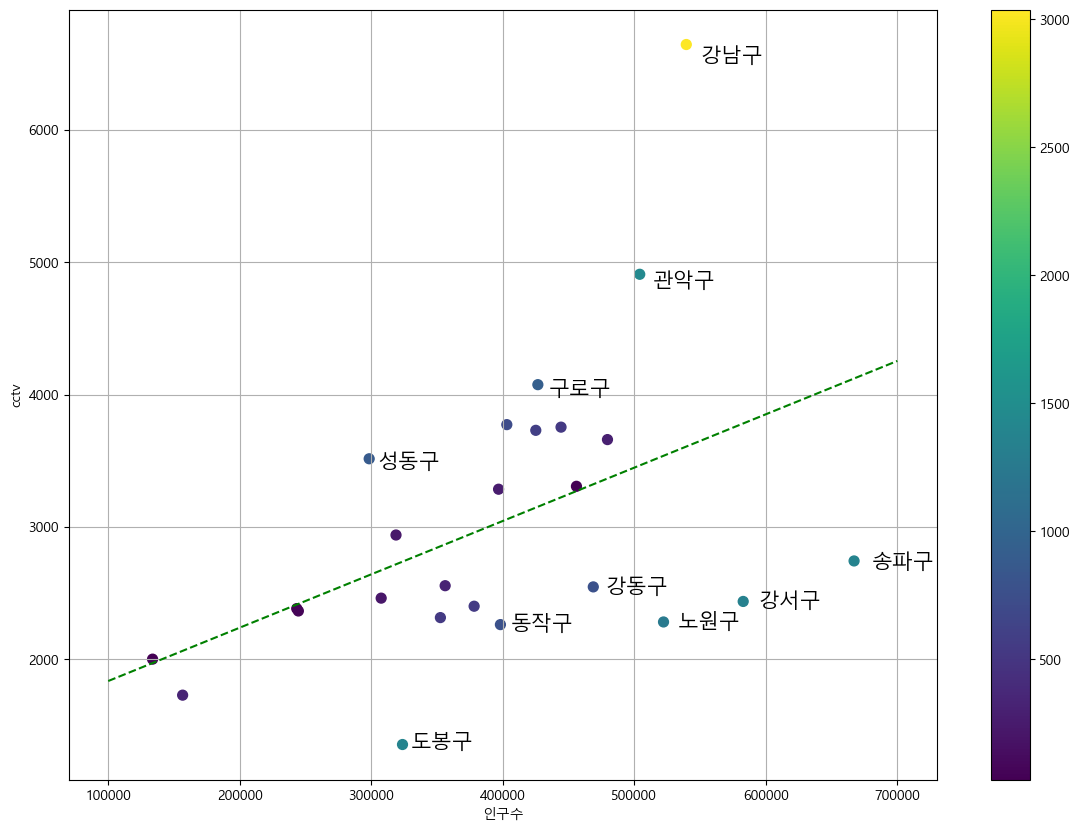

In [102]:
plt.figure(figsize = (14, 10))
plt.scatter(data_result['인구수'], data_result['총계'], s = 50, c = data_result['오차'])
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['총계'][n]* 0.98,
             df_sort.index[n], fontsize = 15)
    
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid()
plt.show()

In [104]:
#conda activate p39-env
#conda install folium
import folium
import json

In [105]:
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [112]:
data_result['cctv비율']

구별
종로구     1.104320
중구      1.496545
용산구     0.979304
성동구     1.177866
광진구     0.717593
동대문구    0.656607
중랑구     0.827858
성북구     0.844934
강북구     0.800554
도봉구     0.418839
노원구     0.436976
은평구     0.763125
서대문구    0.921854
마포구     0.634822
양천구     0.725189
강서구     0.418151
구로구     0.955059
금천구     0.967027
영등포구    0.936066
동작구     0.568049
관악구     0.973737
서초구     0.877434
강남구     1.231609
송파구     0.411173
강동구     0.543285
Name: cctv비율, dtype: float64

In [122]:
type(data_result)

pandas.core.frame.DataFrame

In [128]:
data_result['cctv비율']

구별
종로구     1.104320
중구      1.496545
용산구     0.979304
성동구     1.177866
광진구     0.717593
동대문구    0.656607
중랑구     0.827858
성북구     0.844934
강북구     0.800554
도봉구     0.418839
노원구     0.436976
은평구     0.763125
서대문구    0.921854
마포구     0.634822
양천구     0.725189
강서구     0.418151
구로구     0.955059
금천구     0.967027
영등포구    0.936066
동작구     0.568049
관악구     0.973737
서초구     0.877434
강남구     1.231609
송파구     0.411173
강동구     0.543285
Name: cctv비율, dtype: float64

In [127]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = data_result['cctv비율'], #default로 index를 뽑아가고 값을 사용함
    columns=[data_result.index, data_result['cctv비율']],
    fill_color='PuRd', #from purple to red --> https://matplotlib.org/stable/tutorials/colors/colormaps.html
    key_on='feature.id',
    legend_name = 'cctv 비율'
).add_to(map1)

#folium.Choropleth(
#    geo_data = "지도 데이터 파일 경로 (.geojson, geopandas.DataFrame)"
#    data = "시각화 하고자 하는 데이터파일. (pandas.DataFrame)"
#    columns = (지도 데이터와 매핑할 값, 시각화 하고자하는 변수),
#    key_on = "feature.데이터 파일과 매핑할 값",
#    fill_color = "시각화에 쓰일 색상",
#    legend_name = "칼라 범주 이름",
#).add_to(m)
#https://dailyheumsi.tistory.com/144
map1

In [132]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = data_result,
    columns=[data_result.index ,'cctv비율'],
    fill_color='PuRd', #from purple to red --> https://matplotlib.org/stable/tutorials/colors/colormaps.html
    key_on='feature.id',
    legend_name = 'cctv 비율'
).add_to(map1)

#folium.Choropleth(
#    geo_data = "지도 데이터 파일 경로 (.geojson, geopandas.DataFrame)"
#    data = "시각화 하고자 하는 데이터파일. (pandas.DataFrame)"
#    columns = (지도 데이터와 매핑할 값, 시각화 하고자하는 변수),
#    key_on = "feature.데이터 파일과 매핑할 값",
#    fill_color = "시각화에 쓰일 색상",
#    legend_name = "칼라 범주 이름",
#).add_to(m)
#https://dailyheumsi.tistory.com/144
map1